# TurboJet Performance Analysis
evaluation of the performance of the turbojet propulsion in respect to the pressure ratio in the compressor and outlet temperature in the combustion chamber in 3 different conditions:

mach :      0,  0.85,   2.00

Pa   : 101.30, 18.75,   7.17

Ta   : 288.20, 216.7, 216.70

### Part 1
importing classes and defining auxiliary functions to load aircraft and setting analysis parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aircraft import Aircraft
from calculation_modules.propulsion.propulsion_wrapper import PropulsionWrapper


def load_aircraft(aircraft_name):
    ''' Import Propulsion from file'''
    aircraft = Aircraft(aircraft_name)
    aircraft.load_aircraft()

    return aircraft

def set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag=True):
    ''' Setting Computation Parameters'''
    propulsion_wrapper = PropulsionWrapper(aircraft)
    propulsion_wrapper.set_mach(mach)
    propulsion_wrapper.set_pressure_a(Pa)
    propulsion_wrapper.set_outlet_pressure(Po)
    propulsion_wrapper.set_temperature_a(Ta)
    propulsion_wrapper.set_compressor_rotation(N_2)
    propulsion_wrapper.set_rotation_flag(rotation_flag)
    return propulsion_wrapper    



### Part 2
Defining and loading aircraft, getting the components (compressor, combustor) that we will vary the parameters. To get a component we need to specify the stream_id of the component and its name.

In [2]:

''' Component Parameters'''
aircraft_name = 'TurboJet21'
aircraft = load_aircraft(aircraft_name)

propulsion_module = aircraft.get_propulsion_module()
compressor = propulsion_module.get_component(1, 'compressor')
combustor = propulsion_module.get_component(1, 'combustor')


### Part 3
Defining the analysis parameters, condition of flight and list of components parameters that we will vary.

In [3]:

''' Analysis Parameters'''
list_of_mach = [0, 0.85, 2.00]
list_of_Pa = [101.30, 18.75, 7.170]
list_of_Ta = [288.2, 216.7, 216.7]
N_2 = 1
list_of_pressure_ratio = np.linspace(1.1, 100, 40)
list_of_combustor_outlet_temperature = [1300, 1500, 1700]
rotation_flag = False

### Part 4
Iterating through the flight condition.

Iterating through the combustion chamber outlet temperature.

Iterating through the pressure ratio of the compressor.



c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inle

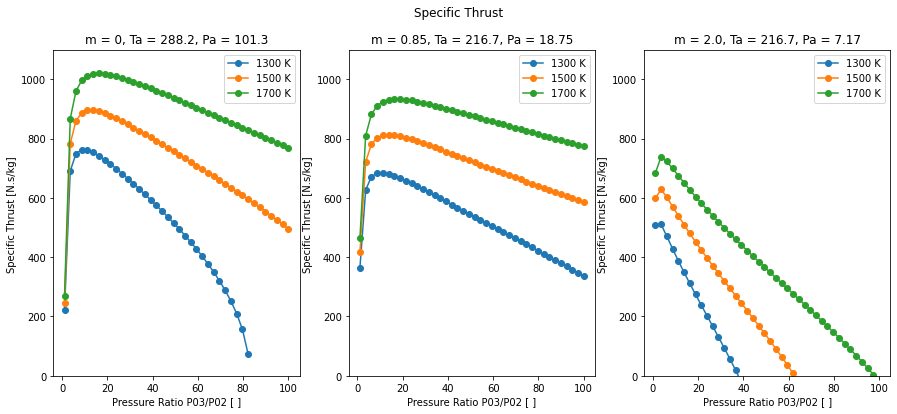

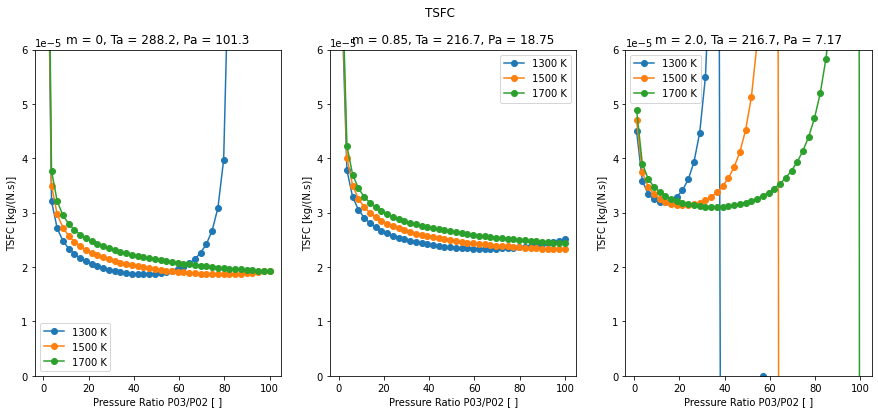

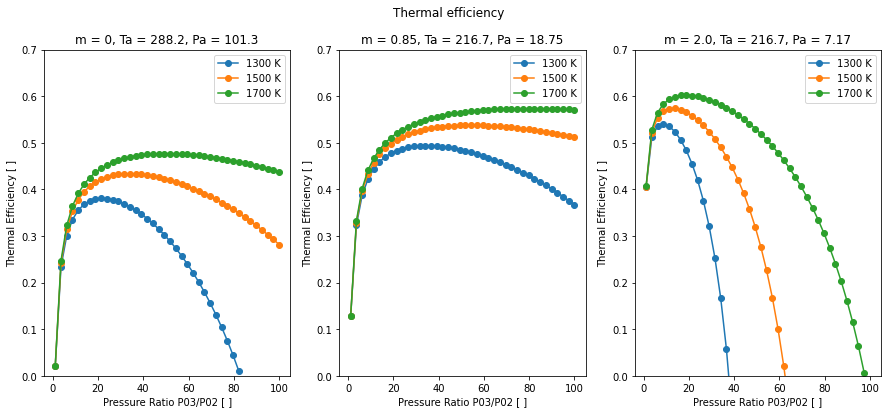

In [4]:

fig1 = plt.figure(figsize=(15,6))
fig1.suptitle("Specific Thrust")

fig2 = plt.figure(figsize=(15,6))
fig2.suptitle("TSFC")

fig3 = plt.figure(figsize=(15,6))
fig3.suptitle("Thermal efficiency")

for k, (mach, Pa, Ta) in enumerate(zip(list_of_mach, list_of_Pa, list_of_Ta)):
    Po = Pa
    
    # subplot for specific thrust for the k-th condition of flight (mach, Pa, Ta)
    axis1 = fig1.add_subplot(1,3,k+1)
    
    # subplot for TSFC for the k-th condition of flight (mach, Pa, Ta)
    axis2 = fig2.add_subplot(1,3,k+1)
    
    # subplot for thermal efficiency for the k-th condition of flight (mach, Pa, Ta)
    axis3 = fig3.add_subplot(1,3,k+1)

    # iterating through the outlet combustor temperature
    for combustor_outlet_temperature in list_of_combustor_outlet_temperature:
        # sets the outlet temperature of the combustor
        combustor.set_outlet_temperature(combustor_outlet_temperature)
        
        # resets the list of results
        list_of_TSFC = []
        list_of_specific_thrust = []
        list_of_thermal_efficiency = []
        list_of_propulsion_efficiency = []
        
        # iterating through the pressure ratio
        for pressure_ratio in list_of_pressure_ratio:
            # sets the pressure ratio of the compressor
            compressor.set_pressure_ratio(pressure_ratio)

            # creates and sets the propulsion wrapper parameters
            propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
            propulsion_wrapper.initialize()
            propulsion_wrapper.compute()
            
            # Gets the results of the propulsion wrapper computation
            propulsion_results = propulsion_wrapper.get_results()
            
            # appends the results to the temporary list of results
            list_of_TSFC.append(propulsion_results.get_TSFC())
            list_of_specific_thrust.append(propulsion_results.get_specific_thrust())
            list_of_thermal_efficiency.append(propulsion_results.get_thermal_efficiency())
            list_of_propulsion_efficiency.append(propulsion_results.get_propulsion_efficiency())

        
        # Plot the specific thrust for the different outlet temperature in the k-th subplot
        axis1.plot(list_of_pressure_ratio, list_of_specific_thrust, marker='o', label = "{} K".format(combustor_outlet_temperature))
        axis1.set_ylim([0, 1100])
        axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
        axis1.set_ylabel("Specific Thrust [N.s/kg] ")
        axis1.set_xlabel("Pressure Ratio P03/P02 [ ]")
        axis1.legend()

        # Plot the TSFC for the different outlet temperature in the k-th subplot
        axis2.plot(list_of_pressure_ratio, list_of_TSFC, marker='o', label = "{} K".format(combustor_outlet_temperature))
        axis2.set_ylim([0, 0.00006])
        axis2.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
        axis2.set_ylabel("TSFC [kg/(N.s)]")
        axis2.set_xlabel("Pressure Ratio P03/P02 [ ]")
        axis2.legend()
        
        # Plot the thermal efficiency for the different outlet temperature in the k-th subplot
        axis3.plot(list_of_pressure_ratio, list_of_thermal_efficiency, marker='o', label = "{} K".format(combustor_outlet_temperature))
        axis3.set_ylim([0, 0.7])
        axis3.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
        axis3.set_ylabel("Thermal Efficiency [ ]")
        axis3.set_xlabel("Pressure Ratio P03/P02 [ ]")
        axis3.legend()


plt.show(block=False)

    